In [19]:
# import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from functions import plotting_fcts
import ipywidgets as widgets

# Budyko and die klimatische Wasserbilanz 

## Mikhail Ivanovich Budyko (20.01.1920 – 10.12.2001)

In den Jahren 1955-1974 studierte Mikhail Budyko (siehe Bild; 
[Quelle](https://public.wmo.int/en/about-us/awards/international-meteorological-organization-imo-prize/mikhail-ivanovich-budyko))im Rahmen seiner Forschungen die Komponenten der Land- und Meeresenergiebilanz, was in Russland und darüber hinaus weithin anerkannt wurde und den Grundstein für einen neuen Bereich der Meteorologie legte - die physikalische Klimatologie (Theorie des Klimas). 

<img src="Budyko.png" alt="drawing" width="300"/>


## Budyko nimmt an, dass die Wasserbilanz großer Einzugsgebiete ($\gg$1000 km²) nur vom Klima kontrolliert wird. 
Die langfristige Wasserbilanz für ein Einzugsgebiet ist dann:

$N = AET + Q$ (1)

wobei $N$ den Niederschlag beschreibt, $AET$ die tatsächliche Verdunstung und $Q$ den Abfluss (alle in mm/y).

Und die Energiebilanz ist:

$R_n = \lambda_w AET + H + G$ (2)

wobei $R_n$ die Nettostrahlung beschreibt, $\lambda_w$ die Verdunstungsenthalpie (die Menge an Energie, die es braucht um eine bestimmte Menge an Wasser zu verdampfen; abhängig von der Temperatur $T$), $H$ die sensible Wärme und $G$ den Bodenwärmefluss (alle in W/m²). $\lambda_w AET$ wird auch als latente Wärme bezeichnet.

## Die klimatische Wasserbilanz 

Die klimatische Wasserbilanz ist definiert als $P - PET$, wobei $PET$ die potentielle Verdunstung beschreibt.

Sie ist eng verwandt mit der sogenannten Aridität $\phi$.

$\phi = \frac{PET}{P}$

Gebiete, in denen $P$ größer als $PET$ ist, werden als *energie-limitiert* bezeichnet. 
Gebiete, in denen $P$ kleiner als $PET$ ist, werden als *wasser-limitiert* bezeichnet.

In wasser-limitierten ist die klimatische Wasserbilanz negativ (bzw. $\phi > 1$).
In solchen Gebieten kann nicht alle Energie genutzt werden um Wasser zu verdunsten, da nicht genügend Wasser vorhanden ist. 
In energie-limitierten Gebieten hingegen kann (fast) alle Energie genutzt werden ($PET \approx AET$), und folglich sollte $P - PET$ dem Abfluss $Q$ entsprechen.

Plottet man nun den Abfluss gegen die klimatische Wasserbilanz, so sieht man einen starken Zusammenhang. 
Die Stärke des Zusammenhangs kann man z.B. mit der sogenannten Spearman Rangkorrelation $\rho_s$ beschreiben.
Gibt es Unterschiede zwischen wasser- und energie-limitierten Gebieten? 


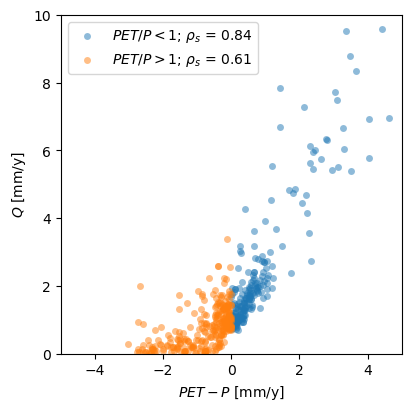

In [16]:
#todo: add more comments

# load data
df = pd.read_csv("results/caravan_processed.csv")

df["aridity_class"] = 0
df.loc[df["aridity_netrad"] > 1, "aridity_class"] = 1
df["climatic_water_balance"] = df["total_precipitation_sum"] - df["netrad"]

#todo: nice units etc., maybe using dict?
def plot_climatic_water_balance(x_name, y_name):
    fig = plt.figure(figsize=(4, 4), constrained_layout=True)
    axes = plt.axes()
    r_sp_energy_limited, _ = stats.spearmanr(df.loc[df["aridity_class"] == 0, x_name],
                                             df.loc[df["aridity_class"] == 0, y_name],
                                             nan_policy='omit')
    im = axes.scatter(df.loc[df["aridity_class"] == 0, x_name], df.loc[df["aridity_class"] == 0, y_name],
                      s=25, c="tab:blue", alpha=0.5, lw=0,
                      label=r"$PET/P < 1$; $\rho_s$ = " + str(np.round(r_sp_energy_limited,2)))
    r_sp_water_limited, _ = stats.spearmanr(df.loc[df["aridity_class"] == 1, x_name],
                                            df.loc[df["aridity_class"] == 1, y_name],
                                            nan_policy='omit')
    im = axes.scatter(df.loc[df["aridity_class"] == 1, x_name], df.loc[df["aridity_class"] == 1, y_name],
                      s=25, c="tab:orange", alpha=0.5, lw=0,
                      label=r"$PET/P > 1$; $\rho_s$ = " + str(np.round(r_sp_water_limited,2)))
    axes.set_xlabel("$PET - P$ [mm/y]")
    axes.set_ylabel("$Q$ [mm/y]")
    axes.set_xlim([-5, 5])
    axes.set_ylim([0, 10])
    #plotting_fcts.plot_origin_line(df[x_name], df[y_name])
    #axes.set_xscale('log')
    #axes.set_yscale('log')
    axes.legend(loc='best')

x_name = "climatic_water_balance"
y_name = "streamflow"
plot_climatic_water_balance(x_name, y_name)
    
%matplotlib inline

Der Zusammenhang zwischen der klimatischen Wasserbilanz und dem Abfluss ist sehr stark, inbesondere in energie-limitierten Gebieten.
Hier sollte $P - PET$ ungefähr $Q$ entsprechen, da genügend Wasser verfügbar ist und somit (fast) alle Energie für Verdunstung (d.h. $AET$) genutzt werden kann.

## Budyko Kurve

...


In [ ]:
def f(x):
    
    #todo: add dict for z name and unit
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    x_name = "aridity_netrad"
    y_name = "runoff_ratio"
    z_name = x #"frac_snow"
    z_unit = " [-]"
    im = axes.scatter(df[x_name], 1-df[y_name], s=25, c=df[z_name], alpha=0.5, lw=0) #, s=df["area"]/100
    axes.set_xlabel("$PET/P$ [-]")
    axes.set_ylabel("$1 - Q/P$ [-]")
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.25, 1.25])
    plotting_fcts.plot_Budyko_limits(df[x_name], df[y_name])
    #axes.set_xscale('log')
    cbar = fig.colorbar(im, ax=axes)
    cbar.set_label(z_name + z_unit)


widgets.interact(f, x=['area', 'seasonality', 'frac_snow', 'slp_dg_sav', 'gwt_cm_sav'])

%matplotlib inline
    
#todo: add Budyko curve


## Abweichungen von der Budyko Kurve
...

ChatGPT


In [22]:
def f(x):
    
    #todo: add dict for z name and unit
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    x_name = "aridity_netrad"
    y_name = "runoff_ratio"
    z_name = x #"frac_snow"
    z_unit = " [-]"
    im = axes.scatter(df[x_name], 1-df[y_name], s=25, c=df[z_name], alpha=0.5, lw=0) #, s=df["area"]/100
    axes.set_xlabel("$PET/P$ [-]")
    axes.set_ylabel("$1 - Q/P$ [-]")
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.25, 1.25])
    plotting_fcts.plot_Budyko_limits(df[x_name], df[y_name])
    #axes.set_xscale('log')
    cbar = fig.colorbar(im, ax=axes)
    cbar.set_label(z_name + z_unit)


widgets.interact(f, x=['seasonality', 'frac_snow', 'slp_dg_sav', 'gwt_cm_sav'])

%matplotlib inline

#todo: calculate Budyko anomaly

interactive(children=(Dropdown(description='x', options=('seasonality', 'frac_snow', 'slp_dg_sav', 'gwt_cm_sav…

## Annahmen der Budyko Kurve
Nur für langjährige Mittelwerte kann die Änderung des Speichers als null angenommen werden.

In [21]:
def f(x):
    
    #todo: add dict for z name and unit
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    x_name = "aridity_netrad"
    y_name = "runoff_ratio"
    z_name = x #"frac_snow"
    z_unit = " [-]"
    im = axes.scatter(df[x_name], 1-df[y_name], s=25, c=df[z_name], alpha=0.5, lw=0) #, s=df["area"]/100
    axes.set_xlabel("$PET/P$ [-]")
    axes.set_ylabel("$1 - Q/P$ [-]")
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.25, 1.25])
    plotting_fcts.plot_Budyko_limits(df[x_name], df[y_name])
    #axes.set_xscale('log')
    cbar = fig.colorbar(im, ax=axes)
    cbar.set_label(z_name + z_unit)


widgets.interact(f, x=['area', 'seasonality', 'frac_snow', 'slp_dg_sav', 'gwt_cm_sav'])

%matplotlib inline
    
#todo: add Budyko curve for small and large areas and for shorter time periods

interactive(children=(Dropdown(description='x', options=('area', 'seasonality', 'frac_snow', 'slp_dg_sav', 'gw…